### Handling missing values

#### Imputation

In [3]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

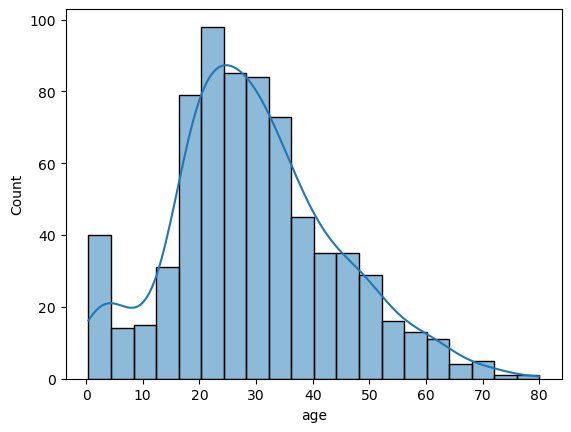

In [11]:
#Imputation Missing values
sns.histplot(df['age'], kde=True)

In [13]:
#Mean Imputation
df['age'] = df['age'].fillna(df['age'].mean())

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
#Mode Imputation
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [22]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
df['embarked'].mode()[0]

'S'

In [32]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [38]:
df.iloc[829]

survived            1
pclass              1
sex            female
age              62.0
sibsp               0
parch               0
fare             80.0
embarked            S
class           First
who             woman
adult_male      False
deck                B
embark_town       NaN
alive             yes
alone            True
Name: 829, dtype: object

#### Upsampling and downsampling

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
np.random.seed(12)

In [73]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=900),
    'feature_2':  np.random.normal(loc=0, scale=1, size=900),
    'target': [0]*900
})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=100),
    'feature_2':  np.random.normal(loc=2, scale=1, size=100),
    'target': [1]*100
})

In [77]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [79]:
df

,feature_1,feature_2,target
0,-1.014558,-0.121222,0
1,0.015399,0.402746,0
2,-0.349104,0.750591,0
3,0.173800,0.190649,0
4,-0.547154,-1.106779,0
...,...,...,...
995,1.076155,1.992380,1
996,2.696755,2.276449,1
997,3.552232,2.737788,1
998,3.041152,2.522434,1


In [81]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [83]:
#Upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [85]:
from sklearn.utils import resample

In [103]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [101]:
df_minority_upsampled.shape

(900, 3)

<Axes: xlabel='feature_2', ylabel='Count'>

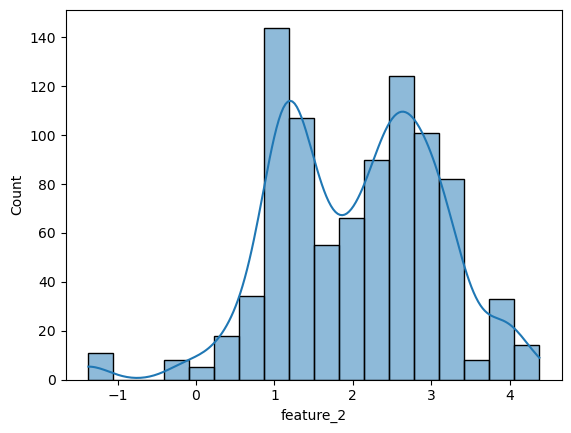

In [111]:
sns.histplot(df_minority_upsampled['feature_2'], kde=True)

In [121]:
#Downsampling
df_majority_downsampled = resample(df_majority, n_samples=len(df_minority), random_state=32, replace=True)

<Axes: xlabel='feature_1', ylabel='Count'>

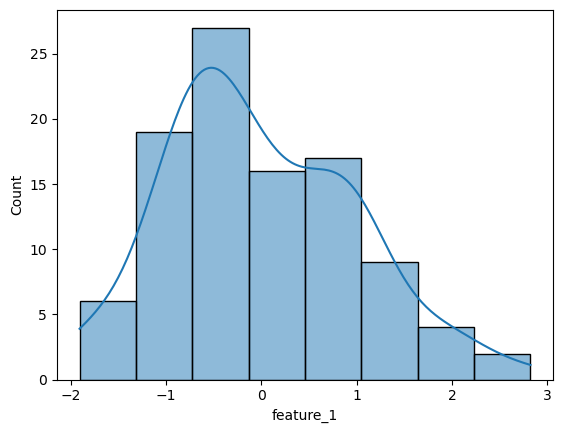

In [123]:
sns.histplot(df_majority_downsampled['feature_1'], kde = True)

#### SMOTE

In [126]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)

In [128]:
x

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [130]:
df1 = pd.DataFrame(x, columns=['feature_1', 'feature_2'])
df2 = pd.DataFrame(y, columns=['target'])

In [134]:
final_df = pd.concat([df1, df2], axis=1).reset_index(drop=True)

In [136]:
final_df

,feature_1,feature_2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


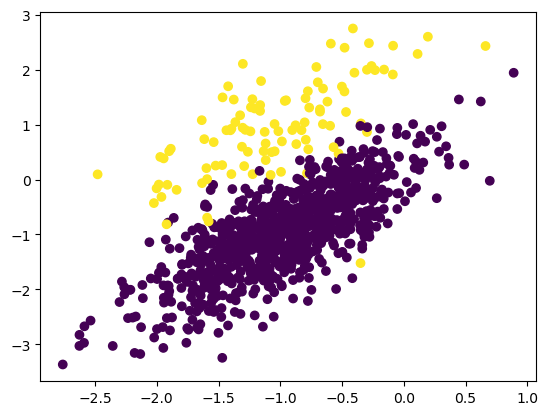

In [138]:
plt.scatter(final_df['feature_1'], final_df['feature_2'], c=final_df['target'])

In [140]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [142]:
x, y = oversample.fit_resample(final_df[['feature_1', 'feature_2']], final_df[['target']])

In [144]:
x.shape

(1800, 2)

In [146]:
y.shape

(1800, 1)

In [152]:
oversampled_df = pd.concat([x,y], axis=1)

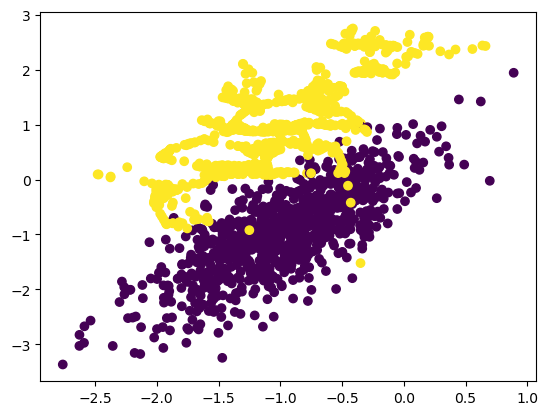

In [156]:
plt.scatter(oversampled_df['feature_1'], oversampled_df['feature_2'], c=oversampled_df['target'])